In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [46]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.insert(4, 'species', iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

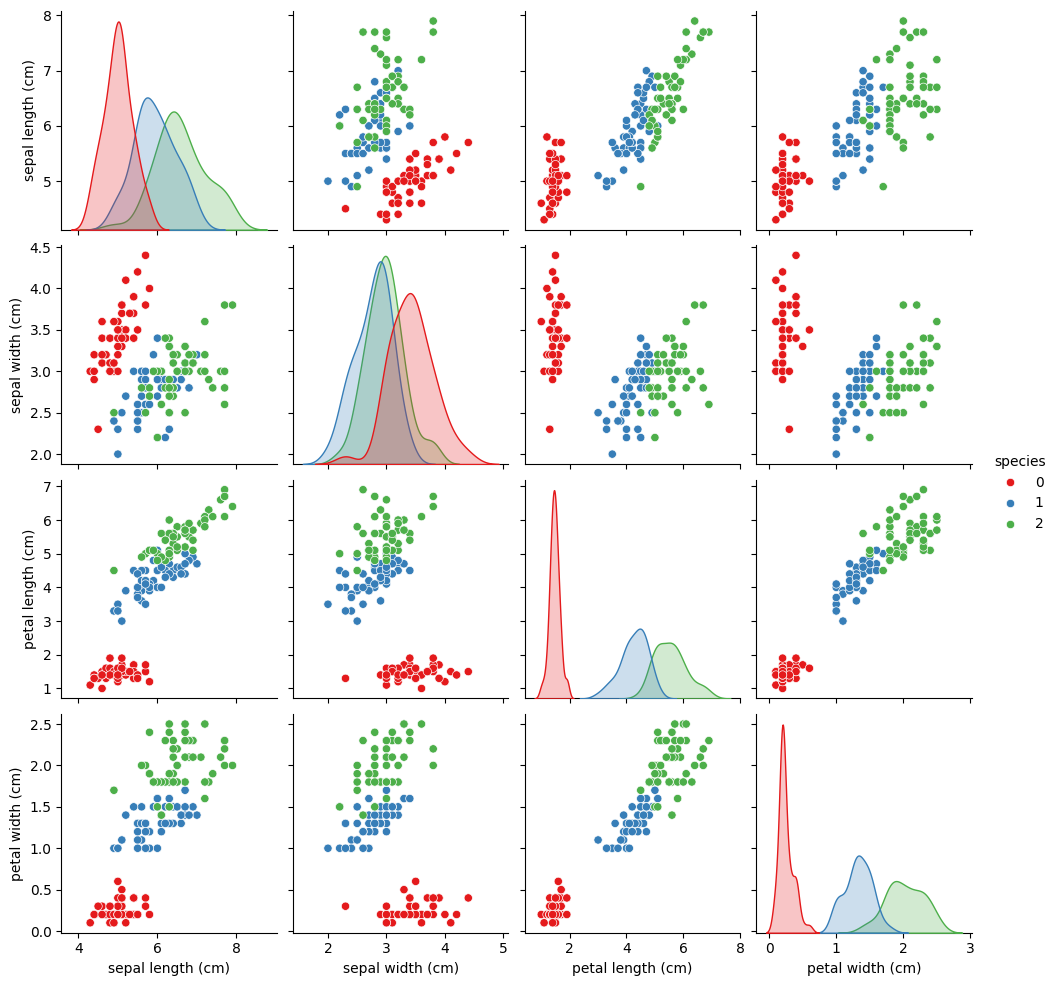

In [48]:
sns.pairplot(df, hue='species', diag_kind='kde', palette='Set1')
plt.show()

In [49]:
X = iris.data[:, :2]
y = iris.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

In [62]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [63]:
y_pred = svc.predict(X_test)

In [64]:
score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {score}')
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7111111111111111
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.60      0.60      0.60        15
           2       0.57      0.53      0.55        15

    accuracy                           0.71        45
   macro avg       0.70      0.71      0.71        45
weighted avg       0.70      0.71      0.71        45



In [65]:
svc_improved = SVC(kernel='rbf', random_state=42)
svc_improved.fit(X_train, y_train)
y_pred_improved = svc_improved.predict(X_test)

In [66]:
improved_score = accuracy_score(y_test, y_pred_improved)
print(f'Accuracy Score: {improved_score}')
print(classification_report(y_test, y_pred_improved))

Accuracy Score: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.62      0.67      0.65        15
           2       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



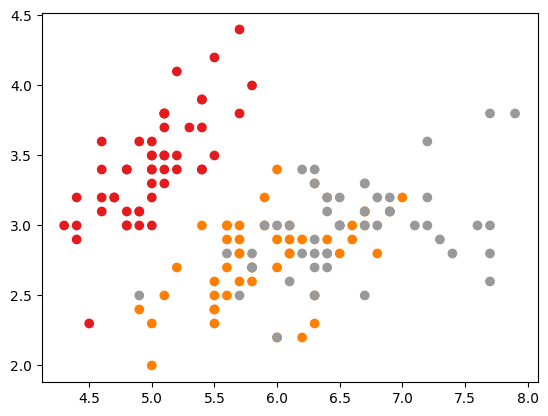

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1')